In [ ]:
import folium
m = folium.Map(location=[45.5236, -122.6750])

In [ ]:
m

In [ ]:
folium.Map(location=[45.5236, -122.6750], zoom_start=30)


In [ ]:
import pandas as pd

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"
state_unemployment = f"{url}/US_Unemployment_Oct2012.csv"
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=state_data,
    columns=["State", "Unemployment"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Unemployment Rate (%)",
).add_to(m)

folium.LayerControl().add_to(m)

m

In [ ]:
import json

import requests

url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
vis1 = json.loads(requests.get(f"{url}/vis1.json").text)
vis2 = json.loads(requests.get(f"{url}/vis2.json").text)
vis3 = json.loads(requests.get(f"{url}/vis3.json").text)


In [ ]:
import branca


url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
county_data = f"{url}/us_county_data.csv"
county_geo = f"{url}/us_counties_20m_topo.json"


df = pd.read_csv(county_data, na_values=[" "])

colorscale = branca.colormap.linear.YlOrRd_09.scale(0, 50e3)
employed_series = df.set_index("FIPS_Code")["Employed_2011"]


def style_function(feature):
    employed = employed_series.get(int(feature["id"][-5:]), None)
    return {
        "fillOpacity": 0.5,
        "weight": 0,
        "fillColor": "#black" if employed is None else colorscale(employed),
    }


m = folium.Map(location=[35.8, 127.6], tiles="cartodbpositron", zoom_start=8)

folium.TopoJson(
    json.loads(requests.get(county_geo).text),
    "objects.us_counties_20m",
    style_function=style_function,
).add_to(m)


m

In [ ]:
import folium
import pandas as pd

df = pd.read_csv(r'C:\Users\2130\Downloads\seoul\seoul_store_2020.csv', sep=',', encoding='euc-kr')
df.head()
df.columns
df[['상권_코드', '상권_코드_명','서비스_업종_코드_명', '분기당_매출_금액']]

In [ ]:
import pandas as pd
import folium
# 지도 데이터 파일.json
geo_dt = json.load(open('C:\\Users\\2130\\Downloads\\우리마을가게TBGIS_TRDAR_RELM (1).json', 'rt', encoding='utf-8'))
# geo_dt = json.load(open('C:\\Users\\2130\\Downloads\\TL_SCCO_CTPRVN.json', 'rt', encoding='utf-8'))
# 시각화할 데이터 파일.csv
state_store = 'C:\\Users\\2130\\Downloads\\seoul\\seoul_store2_2020.csv'
state_data = pd.read_csv(state_store, encoding='utf-8', engine='python')

m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)
m.choropleth(
    geo_data = geo_dt,
    data = state_data,
    columns = ['상권_코드','분기당_매출_금액'],
    # featureidkey='properties.TRDAR_CD',
    key_on = 'properties.TRDAR_CD',
    fill_color='YlGn',
    legend_name='Unemployment Rate (%)'
)
m

In [ ]:
import os
os.getcwd()

In [ ]:
import pandas as pd
import folium
import json
# 지도 데이터 파일.json
# geo_dt = json.load(open('.\\csv_files\\시군구LARD_ADM_SECT_SGG_11.json', 'rt', encoding='utf-8'))
geo_dt = json.load(open('.//json_files//시군구LARD_ADM_SECT_SGG_11.json', 'rt', encoding='utf-8'))

# 시각화할 데이터 파일.csv
state_store = ".//csv_files//서울시 우리마을가게 상권분석서비스(자치구별 상권변화지표).csv"
state_data = pd.read_csv(state_store, encoding='utf-8', engine='python')

# m = folium.Map(location=[37.541, 126.986], tiles="OpenStreetMap", zoom_start=10)
m = folium.Map(location=[37.541, 126.986], tiles="cartodbpositron", zoom_start=11)
m.choropleth(
    geo_data = geo_dt,
    data = state_data,
    # csv와 json연결할 col, 수치를 나타낼 col
    columns = ['시군구_코드_명','운영_영업_개월_평균'],
    key_on = 'properties.SGG_NM',
    fill_color='YlGn',
    legend_name='운영 영업 평균(월)'
)
folium.GeoJson(
    geo_dt,
    zoom_on_click=True,
    name ='SGG_NM'
).add_to(m)
m

In [50]:
import pandas as pd
import folium
import json
# 지도 데이터 파일.json
geo_dt = json.load(open('.//json_files//시군구LARD_ADM_SECT_SGG_11.json', 'rt', encoding='utf-8'))


# 시각화할 데이터 파일.csv
state_store = ".//csv_files//서울시 우리마을가게 상권분석서비스(자치구별 상권변화지표).csv"
state_data = pd.read_csv(state_store, encoding='utf-8', engine='python')
# 시군구 마커 위경도 파일.csv
geographic_Coordinate_System = ".//csv_files//시군구위경도.csv"
geographic_Coordinate_System_data = pd.read_csv(geographic_Coordinate_System, encoding='utf-8', engine='python')

# 중구 위경도
m = folium.Map(location=[37.563881104146, 126.99818030678], tiles="cartodbpositron", zoom_start=11, zoom_control=True, max_zoom=13, min_zoom=11)

# 서울시 시군구 마커
for i in geographic_Coordinate_System_data.index:
    # 행 우선 접근 방식으로 값 추출하기
    name = geographic_Coordinate_System_data.loc[i, '시군구']
    lat = geographic_Coordinate_System_data.loc[i, '위도']
    lng = geographic_Coordinate_System_data.loc[i, '경도']
    
    # 마커 접근시 이름 표시
    ftooltip=folium.Tooltip(name, sticky=False)

    # 추출한 정보를 지도에 표시
#     marker = folium.Marker(
#         [lat,lng],
#         # popup = name,
#         tooltip = ftooltip,
#         icon = folium.Icon(color='red', icon='star')
#     )
#     marker.add_to(m)

# 서울 시군구 구역 나눔
ch = folium.Choropleth(
    geo_data = geo_dt,
    data = state_data,
    # csv와 json연결할 col, 수치를 나타낼 col
    columns = ['시군구_코드_명','운영_영업_개월_평균'],
    key_on = 'properties.SGG_NM',
    fill_color='YlGn',
    fill_opacity=1,
    line_opacity=1,
    legend_name='운영 영업 평균(월)',
    highlight=True,
    
).add_to(m)
# 클릭시 확대
folium.GeoJson(
    geo_dt,
    zoom_on_click=True
)

style_function = "font-size: 20px; font-weight: bold"
ch.geojson.add_child(
    folium.features.GeoJsonTooltip(['SGG_NM'], style=style_function, labels=False))

# m.save("seoulMarker3.html")
m

In [4]:
import pandas as pd
import folium
import json
# 지도 데이터 파일.json
geo_dt = json.load(open('.//json_files//시군구LARD_ADM_SECT_SGG_11.json', 'rt', encoding='utf-8'))


# 시각화할 데이터 파일.csv
state_store = ".//csv_files//서울시 우리마을가게 상권분석서비스(자치구별 상권변화지표).csv"
state_data = pd.read_csv(state_store, encoding='utf-8', engine='python')
# 시군구 마커 위경도 파일.csv
geographic_Coordinate_System = ".//csv_files//시군구위경도.csv"
geographic_Coordinate_System_data = pd.read_csv(geographic_Coordinate_System, encoding='utf-8', engine='python')

# 중구 위경도
m = folium.Map(location=[37.563881104146, 126.99818030678], tiles="cartodbpositron", zoom_start=11, zoom_control=True)

# 클릭시 확대
folium.GeoJson(
    geo_dt,
    zoom_on_click=True
).add_to(m)

# 서울 시군구 구역 나눔
ch = folium.Choropleth(
    geo_data = geo_dt,
    data = state_data,
    # csv와 json연결할 col, 수치를 나타낼 col
    columns = ['시군구_코드_명','운영_영업_개월_평균'],
    key_on = 'properties.SGG_NM',
    fill_color='YlGn',
    fill_opacity=1,
    line_opacity=1,
    legend_name='운영 영업 평균(월)',
    highlight=True
).add_to(m)


style_function = "font-size: 20px; font-weight: bold"
val_Tooltip = folium.GeoJsonTooltip(['SGG_NM'], style=style_function, labels=False)
geo_Tooltip = folium.GeoJson('.//json_files//시군구LARD_ADM_SECT_SGG_11.json', tooltip = val_Tooltip).add_to(m)
m.fit_bounds(geo_Tooltip.get_bounds()) #get_bounds()는 개체의 모든 하위경계를 구성한다. 맵자체의 경계를 계산하고(없음 리턴) 이후 하위 경계를 계산한다.


# m.save("seoulMarker2.html")
m

In [ ]:
import pandas as pd
import folium
import json
# 지도 데이터 파일.json
geo_dt = json.load(open('.//json_files//시군구LARD_ADM_SECT_SGG_11.json', 'rt', encoding='utf-8'))


# 시각화할 데이터 파일.csv
state_store = ".//csv_files//서울시 우리마을가게 상권분석서비스(자치구별 상권변화지표).csv"
state_data = pd.read_csv(state_store, encoding='utf-8', engine='python')
# 시군구 마커 위경도 파일.csv
geographic_Coordinate_System = ".//csv_files//시군구위경도.csv"
geographic_Coordinate_System_data = pd.read_csv(geographic_Coordinate_System, encoding='utf-8', engine='python')

# 중구 위경도
m = folium.Map(location=[37.563881104146, 126.99818030678], tiles="cartodbpositron", zoom_start=11, zoom_control=True, max_zoom=13, min_zoom=11)

# 클릭시 확대
folium.GeoJson(
    geo_dt,
    zoom_on_click=True
).add_to(m)

# 서울 시군구 구역 나눔
ch = folium.Choropleth(
    geo_data = geo_dt,
    data = state_data,
    # csv와 json연결할 col, 수치를 나타낼 col
    columns = ['시군구_코드_명','운영_영업_개월_평균'],
    key_on = 'properties.SGG_NM',
    fill_color='YlGn',
    fill_opacity=1,
    line_opacity=1,
    legend_name='운영 영업 평균(월)',
    highlight=True
).add_to(m)


style_function = "font-size: 20px; font-weight: bold"
val_Tooltip = folium.GeoJsonTooltip(['SGG_NM'], style=style_function, labels=False)
geo_Tooltip = folium.GeoJson('.//json_files//시군구LARD_ADM_SECT_SGG_11.json', tooltip = val_Tooltip).add_to(m)
m.fit_bounds(geo_Tooltip.get_bounds()) #get_bounds()는 개체의 모든 하위경계를 구성한다. 맵자체의 경계를 계산하고(없음 리턴) 이후 하위 경계를 계산한다.


# m.save("seoulMarker2.html")
m

# 
# 
# 마우스 이벤트
# 

<AxesSubplot:xlabel='지역명', ylabel='count'>

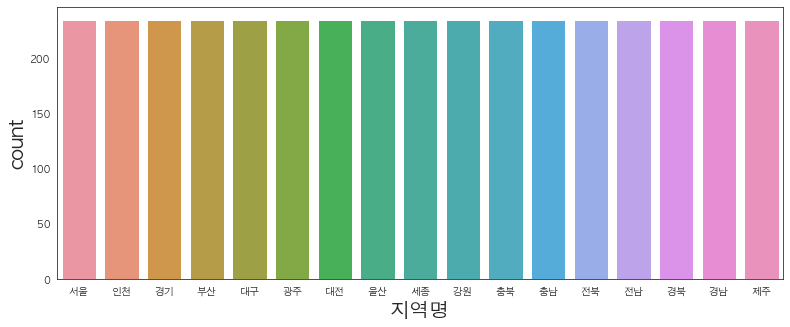

In [16]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # 전국 주택가격 공공데이터 데이터셋 로딩
# house = pd.read_csv('http://bit.ly/teddy-houseprice')
# house.head()
# # jupyter notebook 내 그래프를 바로 그리기 위한 설정
# %matplotlib inline
# plt.rc('font', family='AppleGothic')

# # unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
# plt.rcParams['axes.unicode_minus'] = False
# plt.figure(figsize=(13, 5))
# sns.countplot(data=house, x='지역명')

In [15]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

print ('설정파일 위치: ', mpl.matplotlib_fname())

font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체갯수
print(len(font_list)) 
[(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]



버전:  3.5.0
설치 위치:  /Users/krc/downloads/yes/envs/project5/lib/python3.9/site-packages/matplotlib/__init__.py
설정 위치:  /Users/krc/.matplotlib
캐시 위치:  /Users/krc/.matplotlib
설정파일 위치:  /Users/krc/downloads/yes/envs/project5/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc
351


[]

In [26]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rcParams
import seaborn as sns

seoul_csv = './/csv_files//소상공인시장진흥공단_상가(상권)정보_서울_202109.csv'
seoul = pd.read_csv(seoul_csv, encoding='utf=8', engine='python')
seoul = seoul[['시군구명', '상권업종대분류명', '상권업종중분류명','시도명']]
# seoul_tail = seoul[['시군구명', '상권업종대분류명', '상권업종중분류명']].tail(10)

# 한글 폰트 설정
# font_path = 'C:\\Users\\2130\\Downloads\\maru\\MaruBuri-Bold.ttf'
# font = font_manager.FontProperties(fname=font_path)

# plt.rc('font', family='Malgun Gothic')
# %matplotlib inline

# font_list = font_manager.findSystemFonts(fontpaths= None, fontext='ttf')
# font_list[:]

# seoul_grby = seoul.groupby(['상권업종대분류명']).count()
# fig, ax = plt.subplots(nrows=2)
# 서울 업종별 수,오름차순
# seoul_sort = seoul_grby.sort_values(['상권업종중분류명'], ascending=False)
# seoul_sort.head(10)


# plt.figure(figsize=(10, 10))
# # sns_color = sns.color_palette("coolwarm",10)
# # sns.palplot(sns_color)
# sns.palplot(sns.color_palette("GnBu_d"))

# sns.countplot(y=seoul['상권업종중분류명'], order=seoul['상권업종중분류명'].value_counts().iloc[:10].index )
# # sns.countplot(y=seoul_tail['상권업종중분류명'], order=seoul_tail['상권업종중분류명'].value_counts().index, ax=ax[1])
# plt.yticks(fontsize=12)
# plt.title('서울시 업종별 개수')
# plt.show(10)

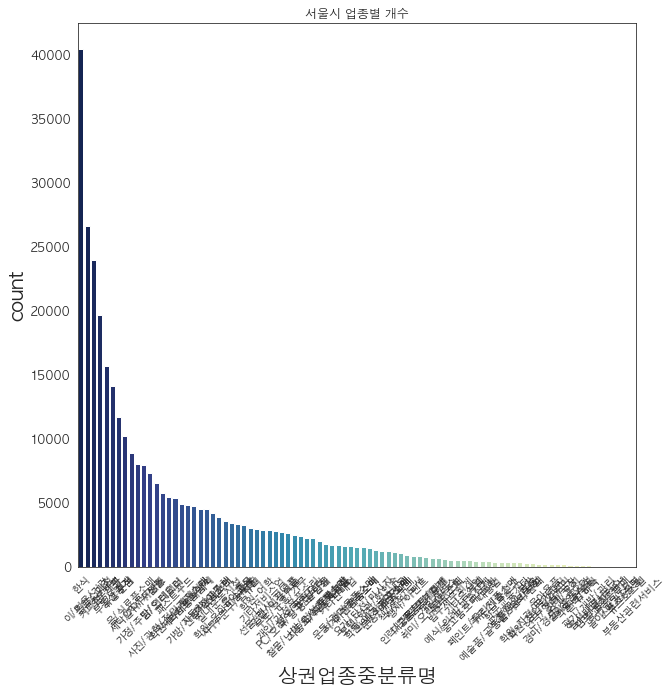

In [28]:
%matplotlib inline

plt.rc('font', family='AppleGothic')
# plt.rc('font', family='AppleGothic')
mpl.rcParams['axes.unicode_minus'] = False




fig, ax = plt.subplots()
fig.set_size_inches(10,10)
# xy 글크기
plt.rc('figure', titlesize=39)
plt.rc('axes', labelsize=20)
# plt.rcParams["figure.figsize"] = (100, 100)
# rcParams['figure.figsize']=(30,30)
# sns.palplot(sns.color_palette("GnBu_d"))
sns.set_style('white')
# sns.palplot()
sns.countplot(x=seoul['상권업종중분류명'], order=seoul['상권업종중분류명'].value_counts().index ,palette='YlGnBu_r',ax=ax)
# sns.countplot(x=seoul['상권업종중분류명'], order=seoul['상권업종중분류명'].value_counts().iloc[:10].index ).invert_yaxis()
# sns.countplot(y=seoul_tail['상권업종중분류명'], order=seoul_tail['상권업종중분류명'].value_counts().index, ax=ax[1])

plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.title('서울시 업종별 개수')
plt.show(10)

In [ ]:
!pip uninstall scipy
!pip install scipy

In [2]:
!pip3 uninstall seaborn
!pip3 install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
  Using cached scipy-1.7.2.tar.gz (36.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/pep517/in_process/_in_process.py prepare_metadata_for_build_wheel /var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/tmpnnyrnrue
       cwd: /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-install-ni9mgnat/scipy_aaece7ee4051485e985459d800bfa92e
  Complete output (181 lines):
  setup.py:491: UserWarning: Unrecognized setuptools command ('dist_info --egg-base /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-modern-metadata-v_mngmzu'), proceeding with generating Cython sources and expanding templates
    warnings.warn("

  Using cached scipy-1.6.1.tar.gz (27.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... error
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 /Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/pep517/in_process/_in_process.py prepare_metadata_for_build_wheel /var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/tmpc4emywmx
       cwd: /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-install-ni9mgnat/scipy_2f86a6342bf6462a91bc52d2afc66544
  Complete output (104 lines):
  setup.py:461: UserWarning: Unrecognized setuptools command ('dist_info --egg-base /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-modern-metadata-y18pbj2m'), proceeding with generating Cython sources and expanding templates
    warnings.warn("Unrecognized setuptools command ('{}'), proceeding with 

  Using cached scipy-1.5.4.tar.gz (25.2 MB)
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-standalone-pip-m2lo660p/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-build-env-41uv2cs6/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.18' 'numpy==1.14.5; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy=

      _configtest.c:22:5: note: 'ctanhl' is a builtin with type '_Complex long double (_Complex long double)'
      22 warnings generated.
      _configtest.c:1:5: warning: incompatible redeclaration of library function 'cabsl' [-Wincompatible-library-redeclaration]
      int cabsl (void);
          ^
      _configtest.c:1:5: note: 'cabsl' is a builtin with type 'long double (_Complex long double)'
      _configtest.c:2:5: warning: incompatible redeclaration of library function 'cacosl' [-Wincompatible-library-redeclaration]
      int cacosl (void);
          ^
      _configtest.c:2:5: note: 'cacosl' is a builtin with type '_Complex long double (_Complex long double)'
      _configtest.c:3:5: warning: incompatible redeclaration of library function 'cacoshl' [-Wincompatible-library-redeclaration]
      int cacoshl (void);
          ^
      _configtest.c:3:5: note: 'cacoshl' is a builtin with type '_Complex long double (_Complex long double)'
      _configtest.c:4:5: warning: incompatibl

  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-standalone-pip-6xb2t7rc/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-build-env-_a7uvs1d/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.18' 'numpy==1.14.5; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and p

      /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/lib/clang/13.0.0/include/mmintrin.h:287:12: error: invalid conversion between vector type '__m64' (vector of 1 'long long' value) and integer type 'int' of different size
          return (__m64)__builtin_ia32_punpcklbw((__v8qi)__m1, (__v8qi)__m2);
                 ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
      /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/lib/clang/13.0.0/include/mmintrin.h:310:12: error: invalid conversion between vector type '__m64' (vector of 1 'long long' value) and integer type 'int' of different size
          return (__m64)__builtin_ia32_punpcklwd((__v4hi)__m1, (__v4hi)__m2);
                 ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
      /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/lib/clang/13.0.0/include/mmintrin.h:331:12: error: invalid conversion between vec

  Using cached scipy-1.5.2.tar.gz (25.4 MB)
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-standalone-pip-nfxu12ux/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-build-env-tpbl6cvs/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.18' 'numpy==1.14.5; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy=

      compile options: '-Inumpy/core/src/common -Inumpy/core/src -Inumpy/core -Inumpy/core/src/npymath -Inumpy/core/src/multiarray -Inumpy/core/src/umath -Inumpy/core/src/npysort -I/Library/Frameworks/Python.framework/Versions/3.10/include/python3.10 -c'
      clang: _configtest.c
      _configtest.c:5:28: error: 'test_array' declared as an array with a negative size
          static int test_array [1 - 2 * !(((long) (sizeof (npy_check_sizeof_type))) <= 1)];
                                 ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
      1 error generated.
      C compiler: clang -Wno-unused-result -Wsign-compare -Wunreachable-code -fno-common -dynamic -DNDEBUG -g -fwrapv -O3 -Wall -arch arm64 -arch x86_64 -g
  
      compile options: '-Inumpy/core/src/common -Inumpy/core/src -Inumpy/core -Inumpy/core/src/npymath -Inumpy/core/src/multiarray -Inumpy/core/src/umath -Inumpy/core/src/npysort -I/Library/Frameworks/Python.framework/Versions/3.10/include/python3.10 -c'
      c

  Using cached scipy-1.5.1.tar.gz (25.6 MB)
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-standalone-pip-ce93b4hr/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-build-env-5lvwg2vb/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.18' 'numpy==1.14.5; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy=

      compile options: '-DNPY_INTERNAL_BUILD=1 -DHAVE_NPY_CONFIG_H=1 -D_FILE_OFFSET_BITS=64 -D_LARGEFILE_SOURCE=1 -D_LARGEFILE64_SOURCE=1 -Inumpy/core/include -Ibuild/src.macosx-10.9-universal2-3.1/numpy/core/include/numpy -Inumpy/core/src/common -Inumpy/core/src -Inumpy/core -Inumpy/core/src/npymath -Inumpy/core/src/multiarray -Inumpy/core/src/umath -Inumpy/core/src/npysort -I/Library/Frameworks/Python.framework/Versions/3.10/include/python3.10 -Ibuild/src.macosx-10.9-universal2-3.1/numpy/core/src/common -Ibuild/src.macosx-10.9-universal2-3.1/numpy/core/src/npymath -Ibuild/src.macosx-10.9-universal2-3.1/numpy/core/src/common -Ibuild/src.macosx-10.9-universal2-3.1/numpy/core/src/npymath -c'
      clang: build/src.macosx-10.9-universal2-3.1/numpy/core/src/multiarray/_multiarray_tests.c
      clang: numpy/core/src/common/mem_overlap.c
      clang -bundle -undefined dynamic_lookup -arch arm64 -arch x86_64 -g build/temp.macosx-10.9-universal2-3.10/build/src.macosx-10.9-universal2-3.1/numpy

  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-standalone-pip-vwu1trgk/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-build-env-cl_zryn6/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.18' 'numpy==1.14.5; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.7'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and p

      _configtest.c:1:5: warning: incompatible redeclaration of library function 'cabs' [-Wincompatible-library-redeclaration]
      int cabs (void);
          ^
      _configtest.c:1:5: note: 'cabs' is a builtin with type 'double (_Complex double)'
      _configtest.c:2:5: warning: incompatible redeclaration of library function 'cacos' [-Wincompatible-library-redeclaration]
      int cacos (void);
          ^
      _configtest.c:2:5: note: 'cacos' is a builtin with type '_Complex double (_Complex double)'
      _configtest.c:3:5: warning: incompatible redeclaration of library function 'cacosh' [-Wincompatible-library-redeclaration]
      int cacosh (void);
          ^
      _configtest.c:3:5: note: 'cacosh' is a builtin with type '_Complex double (_Complex double)'
      _configtest.c:4:5: warning: incompatible redeclaration of library function 'carg' [-Wincompatible-library-redeclaration]
      int carg (void);
          ^
      _configtest.c:4:5: note: 'carg' is a builtin with type 

  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-standalone-pip-defyua_e/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-build-env-fc0xbz9p/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.13' 'numpy==1.13.3; python_version=='"'"'3.5'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.5'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and p

          static int test_array [1 - 2 * !(((long) (sizeof (npy_check_sizeof_type))) <= 0)];
                                 ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
      1 error generated.
      C compiler: clang -Wno-unused-result -Wsign-compare -Wunreachable-code -fno-common -dynamic -DNDEBUG -g -fwrapv -O3 -Wall -arch arm64 -arch x86_64 -g
  
      compile options: '-Inumpy/core/src/common -Inumpy/core/src -Inumpy/core -Inumpy/core/src/npymath -Inumpy/core/src/multiarray -Inumpy/core/src/umath -Inumpy/core/src/npysort -I/Library/Frameworks/Python.framework/Versions/3.10/include/python3.10 -c'
      clang: _configtest.c
      _configtest.c:5:28: error: 'test_array' declared as an array with a negative size
          static int test_array [1 - 2 * !(((long) (sizeof (npy_check_sizeof_type))) <= 1)];
                                 ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
      1 error generated.
      C compiler: clang -Wno-unused-result -Wsign-com

  Using cached scipy-1.4.0.tar.gz (24.6 MB)
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-standalone-pip-0s8f5xz4/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-build-env-31xkyoj9/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.13' 'numpy==1.13.3; python_version=='"'"'3.5'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.5'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy=

      /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/lib/clang/13.0.0/include/mmintrin.h:504:12: error: invalid conversion between vector type '__m64' (vector of 1 'long long' value) and integer type 'int' of different size
          return (__m64)__builtin_ia32_psubb((__v8qi)__m1, (__v8qi)__m2);
                 ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
      fatal error: too many errors emitted, stopping now [-ferror-limit=]
      20 errors generated.
      failure.
      removing: _configtest.c _configtest.o
      C compiler: clang -Wno-unused-result -Wsign-compare -Wunreachable-code -fno-common -dynamic -DNDEBUG -g -fwrapv -O3 -Wall -arch arm64 -arch x86_64 -g
  
      compile options: '-Inumpy/core/src/common -Inumpy/core/src -Inumpy/core -Inumpy/core/src/npymath -Inumpy/core/src/multiarray -Inumpy/core/src/umath -Inumpy/core/src/npysort -I/Library/Frameworks/Python.framework/Versions/3.10/include/python3.10 -c'
      clang: _confi

  Using cached scipy-1.3.3.tar.gz (23.8 MB)
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-standalone-pip-a9473wuz/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-build-env-_avmx9p5/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.13' 'numpy==1.13.3; python_version=='"'"'3.5'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.5'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy=

      C compiler: clang -Wno-unused-result -Wsign-compare -Wunreachable-code -fno-common -dynamic -DNDEBUG -g -fwrapv -O3 -Wall -arch arm64 -arch x86_64 -g
  
      compile options: '-Inumpy/core/src/common -Inumpy/core/src -Inumpy/core -Inumpy/core/src/npymath -Inumpy/core/src/multiarray -Inumpy/core/src/umath -Inumpy/core/src/npysort -I/Library/Frameworks/Python.framework/Versions/3.10/include/python3.10 -c'
      clang: _configtest.c
      clang _configtest.o -o _configtest
      success!
      removing: _configtest.c _configtest.o _configtest.o.d _configtest
      C compiler: clang -Wno-unused-result -Wsign-compare -Wunreachable-code -fno-common -dynamic -DNDEBUG -g -fwrapv -O3 -Wall -arch arm64 -arch x86_64 -g
  
      compile options: '-Inumpy/core/src/common -Inumpy/core/src -Inumpy/core -Inumpy/core/src/npymath -Inumpy/core/src/multiarray -Inumpy/core/src/umath -Inumpy/core/src/npysort -I/Library/Frameworks/Python.framework/Versions/3.10/include/python3.10 -c'
      clang: _con

  Using cached scipy-1.3.2.tar.gz (23.6 MB)
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-standalone-pip-6cdqh5vv/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-build-env-rl5unbgu/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.13' 'numpy==1.13.3; python_version=='"'"'3.5'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version=='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.17.3; python_version>='"'"'3.8'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.5'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy=

  Using cached scipy-1.3.1.tar.gz (23.6 MB)
  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-standalone-pip-62l4k650/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-build-env-md8d69n2/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.2' 'numpy==1.13.3; python_version=='"'"'3.5'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.13.3; python_version=='"'"'3.6'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.14.5; python_version>='"'"'3.7'"'"' and platform_system!='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.5'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==1.16.0; python_version=='"'"'3.6'"'"' and platform_system=='"'"'AIX'"'"'' 'numpy==

      /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/lib/clang/13.0.0/include/mmintrin.h:352:12: error: invalid conversion between vector type '__m64' (vector of 1 'long long' value) and integer type 'int' of different size
          return (__m64)__builtin_ia32_paddb((__v8qi)__m1, (__v8qi)__m2);
                 ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
      /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/lib/clang/13.0.0/include/mmintrin.h:373:12: error: invalid conversion between vector type '__m64' (vector of 1 'long long' value) and integer type 'int' of different size
          return (__m64)__builtin_ia32_paddw((__v4hi)__m1, (__v4hi)__m2);
                 ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
      /Applications/Xcode.app/Contents/Developer/Toolchains/XcodeDefault.xctoolchain/usr/lib/clang/13.0.0/include/mmintrin.h:394:12: error: invalid conversion between vector type '__m64'

  Installing build dependencies ... error
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-standalone-pip-mr3zo9bg/__env_pip__.zip/pip install --ignore-installed --no-user --prefix /private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-build-env-xq1qkn9u/overlay --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools 'Cython>=0.29.2' 'numpy==1.13.3; python_version=='"'"'3.5'"'"'' 'numpy==1.13.3; python_version=='"'"'3.6'"'"'' 'numpy==1.14.5; python_version>='"'"'3.7'"'"''
       cwd: None
  Complete output (4084 lines):
  Ignoring numpy: markers 'python_version == "3.5"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6"' don't match your environment
    Using cached wheel-0.37.0-py2.py3-none-any.whl (35 kB)
    Using cached setuptools-59.2.0-py3-none-any.whl

  Using cached scipy-1.2.3.tar.gz (23.3 MB)
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for scipy, since package 'wheel' is not installed.
    Running setup.py install for scipy ... error
    ERROR: Command errored out with exit status 1:
     command: /Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-install-ni9mgnat/scipy_ced7d1c4892046ee9c657bb584eda533/setup.py'"'"'; __file__='"'"'/private/var/folders/ww/yfbvhkn92y960d31v8t_3hx40000gn/T/pip-install-ni9mgnat/scipy_ced7d1c4892046ee9c657bb584eda533/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /private/var/folders/ww/yfbvhkn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import openpyxl

# 인구 데이터 파일.excel
excel = ".\\21서울인구.xlsx"
seoul_excel_dt = pd.read_excel(excel, engine="openpyxl")

seoul_excel_dt = seoul_excel_dt[['자치구', '세대', '인구', '인구.1', '인구.2']]
# seoul_excel_dt.head(20)

# 한글 설정
plt.rc('font', family='Malgun Gothic')
%matplotlib inline
# 자치구, 총인구, 남자, 여자
ss = seoul_excel_dt.iloc[3:,[0,2,3,4]]
ss
# plt.figure(figsize=(12,20))
# sns.barplot(x=ss['자치구'], y=ss['인구'])
# plt.xticks(rotation=45)
# plt.yticks(fontsize=15)
# plt.ylim([100000, 700000])
# plt.title('서울시 자치구별 인구수')
# plt.rc('xtick', labelsize=15)
# plt.show()


fig, ax = plt.subplot(ncols=2, sharey=True)
ax[0].barh(seoul_excel_dt.index.tolist(), seoul_excel_dt.tolist(), align='center', color='', height=100)
ax[0].set(title='남자')
ax[0].barh(seoul_excel_dt.index.tolist(), seoul_excel_dt.tolist(), align='center', color='', height=100)
ax[1].set(title='여자')
ax[0].invert_xaxis()
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [52]:
jupyter kernelspec list


SyntaxError: invalid syntax. Perhaps you forgot a comma? (3627058317.py, line 1)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 서울시 우리마을가게 상권분석서비스(상권-상권변화지표).csv
seoul_change = pd.read_csv('.//csv_files//소상공인시장진흥공단_상가(상권)정보_서울_202109.csv',encoding='utf=8')
pd.set_option('display.max_columns', 500)

seoul_change.head(1)

상가업소번호     상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0  22767534  BYC상신점  상신점         D       소매       D05     의복의류    D05A07   

   상권업종소분류명 표준산업분류코드 표준산업분류명  시도코드    시도명  시군구코드 시군구명       행정동코드  행정동명  \
0  셔츠/내의/속옷      NaN     NaN    11  서울특별시  11710  송파구  1171053200  거여2동   

        법정동코드 법정동명                 지번코드  대지구분코드 대지구분명  지번본번지  지번부번지  \
0  1171011300  거여동  1171011300100360000       1    대지     36    NaN   

               지번주소         도로명코드            도로명  건물본번지  건물부번지  \
0  서울특별시 송파구 거여동 36  117103123014  서울특별시 송파구 오금로    527    NaN   

                      건물관리번호   건물명              도로명주소   구우편번호   신우편번호  동정보  \
0  1171011300100360000022458  성암빌딩  서울특별시 송파구 오금로 527  138110  5768.0  NaN   

  층정보  호정보          경도         위도  
0   1  NaN  127.147321  37.493054